PAS 1 ANALITZAR NOSTRE DATASET (PRACTICA 1)

In [2]:
%matplotlib widget
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats
from ipywidgets import interact

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('pokemon.csv')
dataset = dataset.drop(['japanese_name', 'name', 'type1', 'type2','abilities'], axis=1) # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
data = dataset.values

x = data[:, 0:-2] # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
y = data[:, -1]

index = dataset.columns[:40]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (801, 41)
Dimensionalitat de les entrades X (801, 39)
Dimensionalitat de l'atribut Y (801,)


D'aqui veiem que la nostra base de dades presenta 801 elements. Ara mirarem si presenta valors no existents, es a dir que el seu valor sigui NaN. Aquests valors poden fer variar el resultat del nostre model i és important tenir-los en compte.

In [59]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weig

In [60]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,49,5120,70,318,45,Seed Pokémon,49,1059860,0.700,45,Fushigidaneフシギダネ,Bulbasaur,88.100,1,65,65,45,grass,poison,6.900,1,0
1,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,62,5120,70,405,45,Seed Pokémon,63,1059860,1.000,60,Fushigisouフシギソウ,Ivysaur,88.100,2,80,80,60,grass,poison,13.000,1,0
2,"['Overgrow', 'Chlorophyll']",1.000,1.000,1.000,0.500,0.500,0.500,2.000,2.000,1.000,0.250,1.000,2.000,1.000,1.000,2.000,1.000,1.000,0.500,100,5120,70,625,45,Seed Pokémon,123,1059860,2.000,80,Fushigibanaフシギバナ,Venusaur,88.100,3,122,120,80,grass,poison,100.000,1,0
3,"['Blaze', 'Solar Power']",0.500,1.000,1.000,1.000,0.500,1.000,0.500,1.000,1.000,0.500,2.000,0.500,1.000,1.000,1.000,2.000,0.500,2.000,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.600,39,Hitokageヒトカゲ,Charmander,88.100,4,60,50,65,fire,NaN,8.500,1,0
4,"['Blaze', 'Solar Power']",0.500,1.000,1.000,1.000,0.500,1.000,0.500,1.000,1.000,0.500,2.000,0.500,1.000,1.000,1.000,2.000,0.500,2.000,64,5120,70,405,45,Flame Pokémon,58,1059860,1.100,58,Lizardoリザード,Charmeleon,88.100,5,80,65,80,fire,NaN,19.000,1,0


Podem observar estadístiques de la nostra base de dades, com la desviació standard d'aquesta (std) , la mitjana de cada variable (mean) entre altres. Aixó ens serveix per descobrir quina distribució segueix cada variable i el seu tipus.

In [61]:
dataset.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,801.000,781.000,801.000,703.000,801.000,801.000,801.000,801.000,781.000,801.000,801.000
mean,0.996,1.057,0.969,1.074,1.069,1.066,1.135,1.193,0.985,1.034,1.098,1.208,0.887,0.975,1.005,1.250,0.983,1.058,77.858,7191.011,65.362,428.377,73.009,1054995.905,1.164,68.959,55.156,401.000,71.306,70.911,66.335,61.378,3.690,0.087
std,0.597,0.438,0.353,0.655,0.522,0.717,0.692,0.604,0.558,0.789,0.739,0.735,0.266,0.549,0.495,0.697,0.500,0.607,32.159,6558.220,19.599,119.204,30.769,160255.835,1.080,26.576,20.262,231.373,32.354,27.943,28.908,109.355,1.930,0.283
min,0.250,0.250,0.000,0.000,0.250,0.000,0.250,0.250,0.000,0.250,0.000,0.250,0.000,0.000,0.000,0.250,0.250,0.250,5.000,1280.000,0.000,180.000,5.000,600000.000,0.100,1.000,0.000,1.000,10.000,20.000,5.000,0.100,1.000,0.000
25%,0.500,1.000,1.000,0.500,1.000,0.500,0.500,1.000,1.000,0.500,1.000,0.500,1.000,0.500,1.000,1.000,0.500,0.500,55.000,5120.000,70.000,320.000,50.000,1000000.000,0.600,50.000,50.000,201.000,45.000,50.000,45.000,9.000,2.000,0.000
50%,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,75.000,5120.000,70.000,435.000,70.000,1000000.000,1.000,65.000,50.000,401.000,65.000,66.000,65.000,27.300,4.000,0.000
75%,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,2.000,1.000,1.000,1.000,2.000,1.000,1.000,100.000,6400.000,70.000,505.000,90.000,1059860.000,1.500,80.000,50.000,601.000,91.000,90.000,85.000,64.800,5.000,0.000
max,4.000,4.000,2.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,1.000,4.000,4.000,4.000,4.000,4.000,185.000,30720.000,140.000,780.000,230.000,1640000.000,14.500,255.000,100.000,801.000,194.000,230.000,180.000,999.900,7.000,1.000


[0.30329459 0.87348834 0.48543982 0.36103809 0.32215494 0.30840535
 0.40628116 0.34324053 0.31163908 0.39302299 1.        ]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
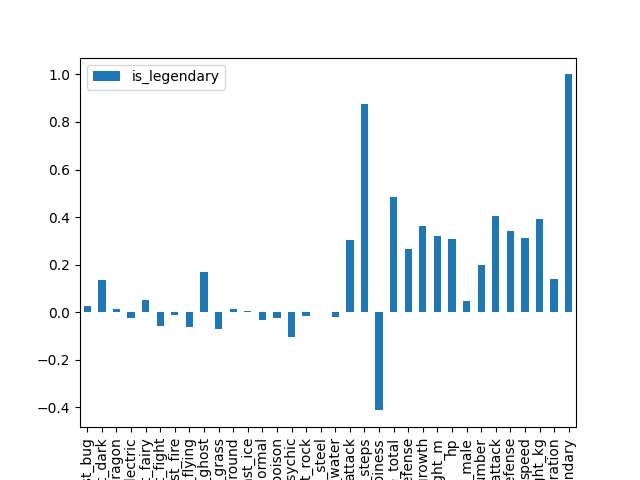

In [14]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

# print("Per visualitzar la correlació entre els atributs d'entrada y el atribut target:")
# print(correlacio.is_legendary.to_frame())

# ax = sns.heatmap(correlacio.is_legendary.to_frame() , annot=True, linewidths=.5)

correlacio.is_legendary.to_frame().plot.bar()

values = correlacio.is_legendary.values
values = values[values > 0.3]

print(values)


ValueError: could not convert string to float: '30 (Meteorite)255 (Core)'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
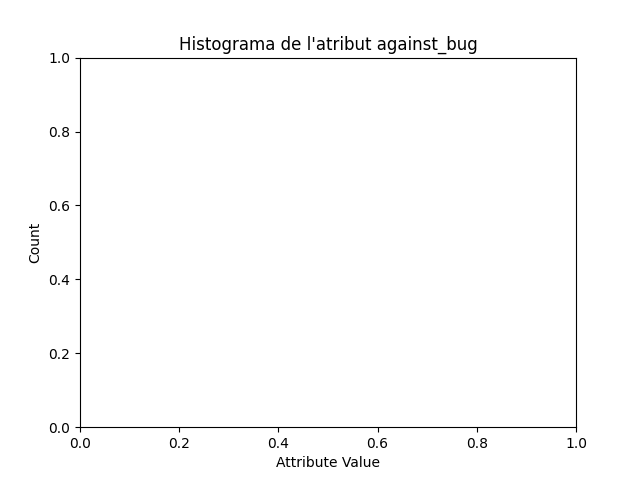

In [13]:
from sklearn import preprocessing

dataset = load_dataset('pokemon.csv')
dataset = dataset.drop(['japanese_name', 'name', 'type1', 'type2','abilities','classfication'], axis=1) # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
data = dataset.values

x = data[:, 0:-2] # no agafem el primer atribut serial number, ja que és un index i no te res de relació amb els altres atributs.
y = data[:, -1]

index = dataset.columns[:40]



for i in range(x.shape[1]):
    plt.figure()
    plt.title("Histograma de l'atribut {}".format(str(index[i])))
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    scaler = preprocessing.StandardScaler().fit(x)
    X_scaled = scaler.transform(x)
    
    hist = plt.hist(X_scaled[:,i], bins=11, range=[np.min(X_scaled[:,i]), np.max(X_scaled[:,i])], histtype="bar", rwidth=0.8)